In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("Onion_2019.csv")
data.shape
data.isnull().sum()

state           0
district        0
market          0
commodity       0
variety         0
arrival_date    0
min_price       0
max_price       0
modal_price     0
dtype: int64

In [2]:
data.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,7/6/2019,6000,10000,8000.0
1,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,11/6/2019,6000,10000,8000.0
2,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,12/6/2019,6000,10000,8000.0
3,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,13/06/2019,6000,10000,8000.0
4,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,14/06/2019,4000,8000,6000.0


In [3]:
# data.drop(columns=['district'],inplace=True)
# # ## remove gb and kg from Ram and weight and convert the cols to numeric
# # data['Ram'] = data['Ram'].str.replace("GB", "")
# # data['Weight'] = data['Weight'].str.replace("kg", "")
# # data['Ram'] = data['Ram'].astype('int32')
# # data['Weight'] = data['Weight'].astype('float32')

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


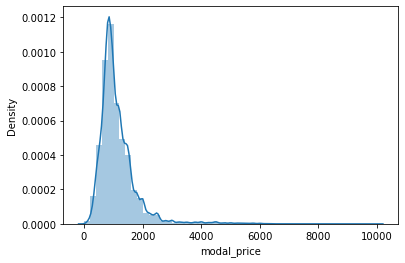

In [4]:
sns.distplot(data['modal_price'])
plt.show()

# Seprate the date month and year

In [5]:
data[["day", "month", "year"]] = data["arrival_date"].str.split("/", expand = True)
print("\nNew DataFrame:")
print(data)


New DataFrame:
                      state         district                         market  \
0       Andaman and Nicobar          Nicobar                    Car Nicobar   
1       Andaman and Nicobar          Nicobar                    Car Nicobar   
2       Andaman and Nicobar          Nicobar                    Car Nicobar   
3       Andaman and Nicobar          Nicobar                    Car Nicobar   
4       Andaman and Nicobar          Nicobar                    Car Nicobar   
...                     ...              ...                            ...   
115501          West Bengal  Sounth Parganas  Diamond Harbour(South 24-pgs)   
115502          West Bengal  Sounth Parganas  Diamond Harbour(South 24-pgs)   
115503          West Bengal  Sounth Parganas  Diamond Harbour(South 24-pgs)   
115504          West Bengal  Sounth Parganas  Diamond Harbour(South 24-pgs)   
115505          West Bengal  Sounth Parganas  Diamond Harbour(South 24-pgs)   

       commodity variety arrival_da

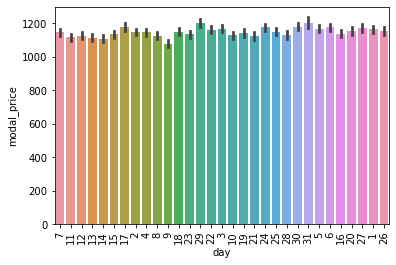

In [6]:
sns.barplot(x=data['day'], y=data['modal_price'])

plt.xticks(rotation="vertical")

plt.show()

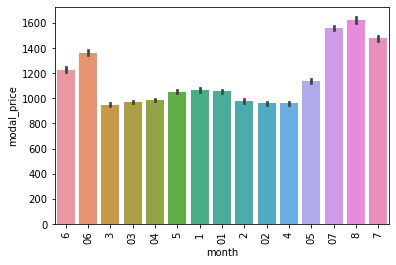

In [7]:
sns.barplot(x=data['month'], y=data['modal_price'])

plt.xticks(rotation="vertical")

plt.show()

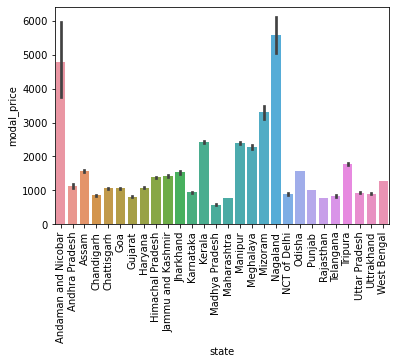

In [8]:
sns.barplot(x=data['state'], y=data['modal_price'])

plt.xticks(rotation="vertical")

plt.show()

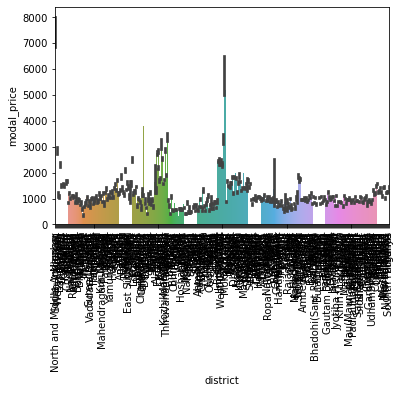

In [9]:
sns.barplot(x=data['district'], y=data['modal_price'])

plt.xticks(rotation="vertical")

plt.show()

***the price vary with district and date,month*** 

# Log-Normal Transformation
we saw the distribution of the target variable above which was right-skewed. By transforming it to normal distribution performance of the algorithm will increase. we take the log of values that transform to the normal distribution which you can observe below. So while separating dependent and independent variables we will take a log of price, and in displaying the result perform exponent of it.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


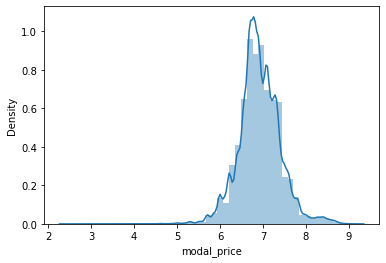

In [10]:
sns.distplot(np.log(data['modal_price']))
plt.show()

# Machine Learning Modeling for Vegitable Prediction

In [12]:
#import Libraries
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


In [13]:
X = data.drop(columns=['modal_price'])

y = np.log(data['modal_price'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=2)

In [16]:
X.head(5)

,state,district,market,commodity,variety,arrival_date,min_price,max_price,day,month,year
0,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,7/6/2019,6000,10000,7,6,2019
1,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,11/6/2019,6000,10000,11,6,2019
2,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,12/6/2019,6000,10000,12,6,2019
3,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,13/06/2019,6000,10000,13,06,2019
4,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,14/06/2019,4000,8000,14,06,2019


In [19]:
step1 = ColumnTransformer(transformers=[

('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])

],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,

random_state=3,

max_samples=0.5,

max_features=0.75,

max_depth=15)

pipe = Pipeline([

('step1',step1),

('step2',step2)

])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

ValueError: could not convert string to float: 'Uttar Pradesh'